In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf

img=Image.open('/kaggle/input/captcha-version-2-images/samples/samples/37d52.png')
plt.imshow(img)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\kaggle\\input\\captcha-version-2-images\\samples\\samples\\37d52.png'

In [3]:
image_dir='/kaggle/input/captcha-version-2-images/samples/samples/'
IMG_WIDTH, IMG_HEIGHT=100,50

In [4]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

all_characters='0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

label_encoder=LabelEncoder()
label_encoder.fit(list(all_characters))

def encoder_label(label):
    return label_encoder.transform(list(label))

encoded_label = encoder_label('6n6gg')
print("Encoded label:", encoded_label)

Encoded label: [ 6 49  6 42 42]


In [20]:
def one_hot_encode_label(encoded_label):
    return to_categorical(encoded_label, num_classes=len(all_characters))

In [21]:
images = []
labels = []

for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path).convert("L")
        img = img.resize((IMG_WIDTH, IMG_HEIGHT), resample=Image.Resampling.LANCZOS)
        img_array = np.array(img) / 255.0
        images.append(img_array)

        label=os.path.splitext(filename)[0]
        encoded_label=encoder_label(label)
        one_hot_label=one_hot_encode_label(encoded_label)
        

        labels.append(one_hot_label)

    


In [22]:
images=np.array(images)
labels=np.array(labels)

In [23]:
images=images.reshape(-1,IMG_HEIGHT,IMG_WIDTH, 1)
images.shape

(1040, 50, 100, 1)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(images,labels,test_size=0.2, random_state=42)
print(X_train[0].shape)

(50, 100, 1)


In [44]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Reshape,TimeDistributed,Dropout,BatchNormalization

In [ ]:
NUM_CHARACTERS = 5
NUM_CLASSES = 62  # 0-9, a-z, A-Z

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(50,100,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(NUM_CHARACTERS * NUM_CLASSES, activation='relu'))  # Expand output
model.add(Dropout(0.2))

# Reshape to (5, 62) for TimeDistributed softmax
model.add(Reshape((NUM_CHARACTERS, NUM_CLASSES)))
model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))


In [52]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history=model.fit(X_train,y_train, epochs=60, validation_data=(X_test,y_test))

Epoch 1/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 336ms/step - accuracy: 0.0473 - loss: 4.0804 - val_accuracy: 0.0625 - val_loss: 4.0972
Epoch 2/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.1305 - loss: 3.0983 - val_accuracy: 0.1096 - val_loss: 4.0693
Epoch 3/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.2670 - loss: 2.3969 - val_accuracy: 0.2894 - val_loss: 3.9804
Epoch 4/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 330ms/step - accuracy: 0.4193 - loss: 1.8570 - val_accuracy: 0.4567 - val_loss: 3.8291
Epoch 5/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.5577 - loss: 1.4025 - val_accuracy: 0.5856 - val_loss: 3.5965
Epoch 6/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 9s 324ms/step - accuracy: 0.6173 - loss: 1.1613 - val_accuracy: 0.6712 - val_loss: 3.4105
Epoch 7/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.6878 - loss: 0.9102 - val_accuracy: 0.7298 - val_loss: 3.1550
Epoch 8/60
26/26 ━━━━━━━━━━━━━━━━━━━━ 8s 316ms/step - accuracy: 0.7079 - loss: 0.8183 - val_accuracy: 0

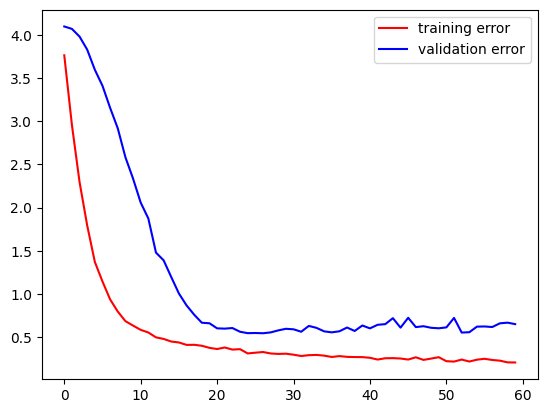

In [54]:
plt.plot(history.history['loss'], label='training error', color='red')
plt.plot(history.history['val_loss'], label='validation error', color='blue')
plt.legend()
plt.show()

(50, 100, 1)

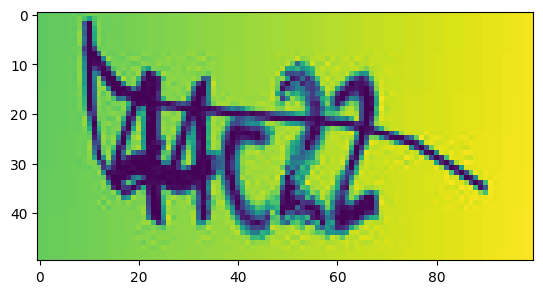

In [57]:
plt.imshow(X_test[0])
X_test[0].shape

In [60]:
y_pred = model.predict(X_test[0].reshape(1, 50, 100, 1))  # Shape: (1, 5, 62)
y_pred = np.argmax(y_pred, axis=2)  # Now shape is (1, 5)
print(y_pred[0])  # Output: array of 5 predicted class indices


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[ 4  4 38  2  2]


In [62]:
characters = list("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
predicted_text=''.join([characters[i] for i in y_pred[0]])
predicted_text

'44C22'